In [ ]:
# Feature Importance
#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/churn.csv")
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
4173,No,87,no,no,0,221.4,69,37.64,195.2,53,16.59,120.6,91,5.43,13.7,4,3.70,1
88,No,74,no,yes,35,154.1,104,26.20,123.4,84,10.49,202.1,57,9.09,10.9,9,2.94,2
3354,No,102,no,no,0,95.6,88,16.25,167.6,106,14.25,177.3,95,7.98,9.8,2,2.65,3
4778,Yes,102,no,yes,48,134.0,83,22.78,234.3,128,19.92,197.3,107,8.88,7.8,4,2.11,6
1857,Yes,107,no,no,0,222.3,101,37.79,286.0,111,24.31,249.4,117,11.22,12.1,4,3.27,1


In [ ]:
print(df.shape)

(5000, 18)


In [ ]:
df.isnull().sum()

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [ ]:
df = df.fillna(0)  # Use with caution.  you eliminate the big holes and then small holes in your data before doing this
print(df.isnull().sum())
print(df.dtypes)

churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64
churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                f

In [ ]:
df.nunique()

churn                            2
accountlength                  218
internationalplan                2
voicemailplan                    2
numbervmailmessages             48
totaldayminutes               1961
totaldaycalls                  123
totaldaycharge                1961
totaleveminutes               1879
totalevecalls                  126
totalevecharge                1659
totalnightminutes             1853
totalnightcalls                131
totalnightcharge              1028
totalintlminutes               170
totalintlcalls                  21
totalintlcharge                170
numbercustomerservicecalls      10
dtype: int64

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
df.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [ ]:
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)

In [ ]:
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# Scale all numeric columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


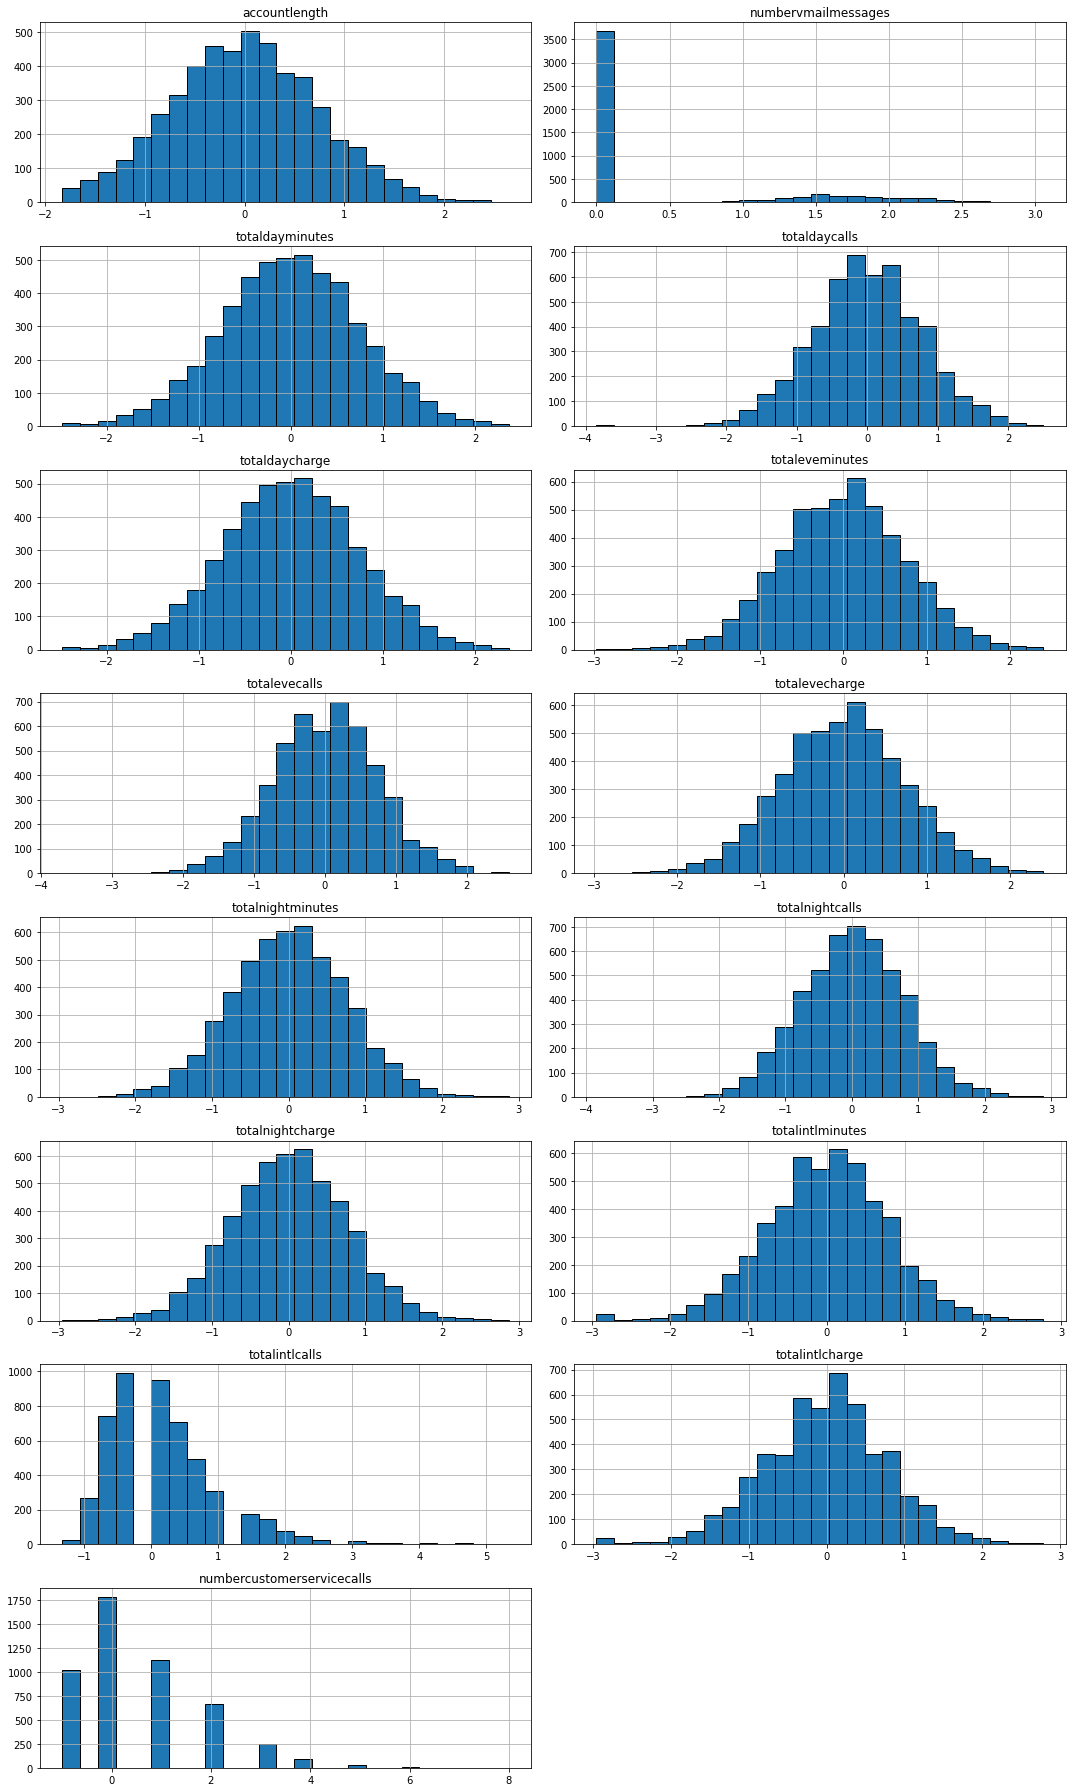

In [ ]:
# Feature Distribution
# Courtesy of Eladio
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2),
edgecolor="black")
plt.tight_layout();

In [ ]:
# Drop the target variable from the DF
catDF.drop(['churn'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
catDF.head()


,internationalplan,voicemailplan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


In [ ]:
# Encode your cat data
catDF = pd.get_dummies(catDF)

In [ ]:
catDF.head()

,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [ ]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['churn']

(5000, 19)


In [ ]:
# Tree models have trouble turning strings to float to labelel the target
Y = Y.replace(to_replace=['No','Yes'],value=[0,1])
print(Y.shape)
X.head()

(5000,)


,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,1,0,0,1,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,1,0,0,1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,1,0,1,0,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,0,1,1,0,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,0,1,1,0,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

In [ ]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)

                       feature  importance
8               totaldaycharge    0.172875
6              totaldayminutes    0.169908
18  numbercustomerservicecalls    0.139998
0         internationalplan_no    0.080443
1        internationalplan_yes    0.077533
11              totalevecharge    0.047735
9              totaleveminutes    0.047270
17             totalintlcharge    0.047178
16              totalintlcalls    0.044958
15            totalintlminutes    0.038381
5          numbervmailmessages    0.025389
2             voicemailplan_no    0.024266
3            voicemailplan_yes    0.019700
12           totalnightminutes    0.017523
14            totalnightcharge    0.015083
7                totaldaycalls    0.009643
13             totalnightcalls    0.008089
10               totalevecalls    0.007121
4                accountlength    0.006907


In [ ]:
#Permutation Importance --- notice that it does NOT use a MODEL
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean

In [ ]:
print(perm.to_string())

                            AVG_Importance STD_Importance
internationalplan_no          1.406667e-02            NaN
internationalplan_yes         1.386667e-02            NaN
voicemailplan_no              3.666667e-03            NaN
voicemailplan_yes             2.200000e-03            NaN
accountlength                -1.333333e-03            NaN
numbervmailmessages           3.600000e-03            NaN
totaldayminutes               3.473333e-02            NaN
totaldaycalls                -7.333333e-04            NaN
totaldaycharge                3.586667e-02            NaN
totaleveminutes               3.133333e-03            NaN
totalevecalls                 3.330669e-17            NaN
totalevecharge                2.733333e-03            NaN
totalnightminutes            -6.666667e-04            NaN
totalnightcalls              -4.666667e-04            NaN
totalnightcharge              5.333333e-04            NaN
totalintlminutes              5.733333e-03            NaN
totalintlcalls

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [ ]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

Feature: 0  Score: -0.00640000000000005
Feature: 1  Score: -0.006333333333333369
Feature: 2  Score: -0.004066666666666696
Feature: 3  Score: -0.003800000000000059
Feature: 4  Score: -0.0037333333333333884
Feature: 5  Score: -0.0017333333333333645
Feature: 6  Score: -0.0008666666666666933
Feature: 7  Score: 0.0006666666666666043
Feature: 8  Score: 0.0006666666666666043
Feature: 9  Score: 0.0017999999999999462
Feature: 10  Score: 0.0023999999999999577
Feature: 11  Score: 0.0025333333333332876
Feature: 12  Score: 0.00459999999999996
Feature: 13  Score: 0.005199999999999971
Feature: 14  Score: 0.005199999999999971
Feature: 15  Score: 0.0067999999999999615
Feature: 16  Score: 0.028133333333333323
Feature: 17  Score: 0.028133333333333323
Feature: 18  Score: 0.036733333333333305


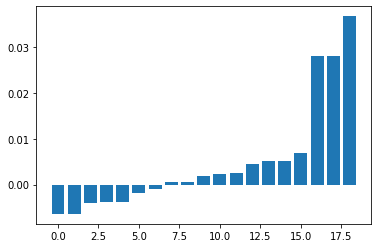

In [ ]:
from matplotlib import pyplot

# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()


Feature: 0 - Name: internationalplan_no - Score: -0.00640000000000005
Feature: 1 - Name: internationalplan_yes - Score: -0.006333333333333369
Feature: 2 - Name: voicemailplan_no - Score: -0.004066666666666696
Feature: 3 - Name: voicemailplan_yes - Score: -0.003800000000000059
Feature: 4 - Name: accountlength - Score: -0.0037333333333333884
Feature: 5 - Name: numbervmailmessages - Score: -0.0017333333333333645
Feature: 6 - Name: totaldayminutes - Score: -0.0008666666666666933
Feature: 7 - Name: totaldaycalls - Score: 0.0006666666666666043
Feature: 8 - Name: totaldaycharge - Score: 0.0006666666666666043
Feature: 9 - Name: totaleveminutes - Score: 0.0017999999999999462
Feature: 10 - Name: totalevecalls - Score: 0.0023999999999999577
Feature: 11 - Name: totalevecharge - Score: 0.0025333333333332876
Feature: 12 - Name: totalnightminutes - Score: 0.00459999999999996
Feature: 13 - Name: totalnightcalls - Score: 0.005199999999999971
Feature: 14 - Name: totalnightcharge - Score: 0.0051999999999

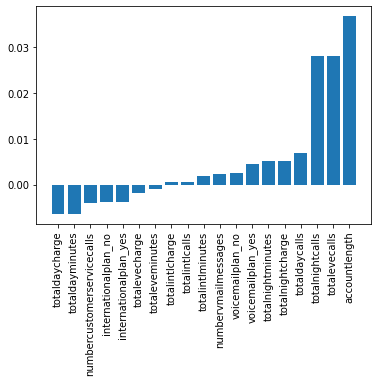

In [ ]:
from matplotlib import pyplot
# Courtesy of Eladio... again :)
# get importance
importance = feature_importances['importance']
importance = results.importances_mean
importance = np.sort(importance)

# get feature names
feature_names = feature_importances['feature']

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: {} - Name: {} - Score: {}'.format(i, feature_names[i], v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(range(len(importance)), feature_names, rotation=90)
pyplot.show()

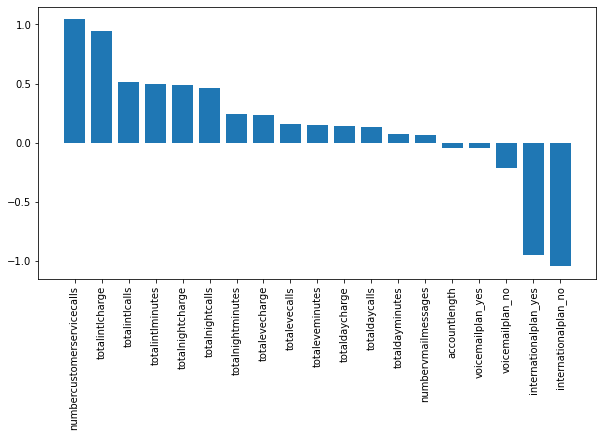

In [ ]:
# Coefficients
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(10,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

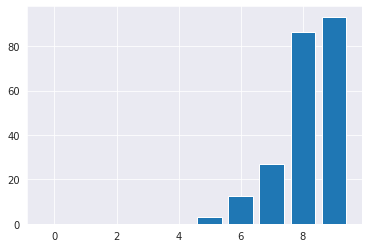

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
X, Y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model=LinearRegression()
model.fit(X,y)
importance=model.coef_
importance=np.sort(importance)
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

Feature: 0, Score: 0.0014678142468689383
Feature: 1, Score: 0.0016147735803133017
Feature: 2, Score: 0.0017992138128753818
Feature: 3, Score: 0.0023459587190605364
Feature: 4, Score: 0.002538615469817934
Feature: 5, Score: 0.0027700688148488573
Feature: 6, Score: 0.004032848142147366
Feature: 7, Score: 0.02768661006162953
Feature: 8, Score: 0.4381666996908368
Feature: 9, Score: 0.5175773974616011


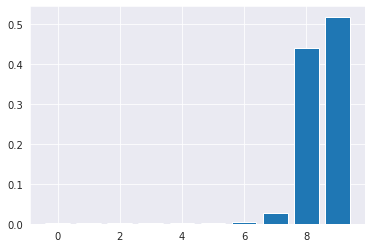

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,Y)
importance = model.feature_importances_
importance = np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()